# Capstone: Kpop Group Lifespan Analysis

### Overall Contents:
- Background
- Data Cleaning
- [Exploratory Data Analysis](#3.Exploratory-Data-Analysis) **(In this notebook)**
- Modeling
- Evaluation
- Conclusion and Recommendation

### Data Dictionary


## 3. Exploratory Data Analysis

### 3.1 Libraries Import

In [1]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
%matplotlib inline 
# Maximum display of columns
pd.options.display.max_colwidth = 400
pd.options.display.max_rows = 400

### 3.2 Data Import

In [2]:
# Import data from csv
musicgroup_df = pd.read_csv('../data/musicgroup_cleaned.csv')
trend_df = pd.read_csv('../data/kpoptrend_cleaned.csv',index_col = 0)

In [3]:
musicgroup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   group_name                   705 non-null    object
 1   company                      705 non-null    object
 2   group_type                   705 non-null    object
 3   debut_year                   705 non-null    int64 
 4   disband_year                 705 non-null    int64 
 5   current_status               705 non-null    object
 6   social_accounts              705 non-null    int64 
 7   inactive_members             705 non-null    int64 
 8   current_members              705 non-null    int64 
 9   original_members_remainding  705 non-null    int64 
 10  initial_members              705 non-null    int64 
 11  member_changes               705 non-null    int64 
 12  subunits                     705 non-null    int64 
 13  albums                       705 no

In [4]:
trend_df.head()

,trend
2004-01,6
2004-02,5
2004-03,3
2004-04,7
2004-05,4


In [5]:
trend_df.index = pd.to_datetime(trend_df.index)

In [6]:
trend_df

,trend
2004-01-01,6
2004-02-01,5
2004-03-01,3
2004-04-01,7
2004-05-01,4
2004-06-01,7
2004-07-01,5
2004-08-01,6
2004-09-01,6
2004-10-01,5


In [7]:
trend_df = trend_df.resample('1Y').mean()

In [8]:
trend_df

,trend
2004-12-31,5.333333
2005-12-31,4.416667
2006-12-31,3.666667
2007-12-31,3.166667
2008-12-31,3.083333
2009-12-31,6.083333
2010-12-31,14.833333
2011-12-31,30.500000
2012-12-31,46.583333
2013-12-31,44.833333


In [9]:
trend_df.index = pd.to_datetime(trend_df.index).year

In [10]:
trend_df

,trend
2004,5.333333
2005,4.416667
2006,3.666667
2007,3.166667
2008,3.083333
2009,6.083333
2010,14.833333
2011,30.500000
2012,46.583333
2013,44.833333


### 3.3 Feature Engineering

### 3.3.1 Total Releases

We create a new feature for the number of releases throughout the group's career thus far.

In [11]:
activities = list(musicgroup_df)[13:26]
musicgroup_df['total_releases'] = musicgroup_df[activities].sum(axis=1)

### 3.3.1 Dummify group_types

As group_type consist of only 'male' and 'female' we replace them to 1(male) and 0(female)

In [12]:
musicgroup_df.group_type = musicgroup_df.group_type.map(lambda x : 1 if x == 'Male' else 0)

### 3.3.2 Data spliting

We split the data into one that consist of groups that are still active and the other that has officially been disbanded. Modeling will be done on the disbanded set while the active set will be used for actual testing of our model.

In [13]:
# used for modeling
disband_df = musicgroup_df[musicgroup_df.current_status == 'Disband']
# used for testing
active_df = musicgroup_df[musicgroup_df.current_status == 'Active']

In [14]:
disband_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 1 to 704
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   group_name                   374 non-null    object
 1   company                      374 non-null    object
 2   group_type                   374 non-null    int64 
 3   debut_year                   374 non-null    int64 
 4   disband_year                 374 non-null    int64 
 5   current_status               374 non-null    object
 6   social_accounts              374 non-null    int64 
 7   inactive_members             374 non-null    int64 
 8   current_members              374 non-null    int64 
 9   original_members_remainding  374 non-null    int64 
 10  initial_members              374 non-null    int64 
 11  member_changes               374 non-null    int64 
 12  subunits                     374 non-null    int64 
 13  albums                       374 no

In [15]:
active_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 702
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   group_name                   331 non-null    object
 1   company                      331 non-null    object
 2   group_type                   331 non-null    int64 
 3   debut_year                   331 non-null    int64 
 4   disband_year                 331 non-null    int64 
 5   current_status               331 non-null    object
 6   social_accounts              331 non-null    int64 
 7   inactive_members             331 non-null    int64 
 8   current_members              331 non-null    int64 
 9   original_members_remainding  331 non-null    int64 
 10  initial_members              331 non-null    int64 
 11  member_changes               331 non-null    int64 
 12  subunits                     331 non-null    int64 
 13  albums                       331 no

### 3.3.3 Lifespan column

We caluculate the lifespan of each music group by taking the year they are disband minus the year that they debuted and add one to it.

In [16]:
disband_df['lifespan'] = disband_df.disband_year-disband_df.debut_year+1

<ipython-input-16-b1ee194f51c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disband_df['lifespan'] = disband_df.disband_year-disband_df.debut_year+1


We also can now drop the column 'current_status' and 'disband_year' as we have no need for it anymore

In [17]:
disband_df.drop('current_status',axis = 1 ,inplace = True)
active_df.drop('current_status',axis = 1 ,inplace = True)

C:\Users\Thomas\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### 3.3.3 Correlation Heatmap
we take a look at the correlation of each columns in a form of a heatmap

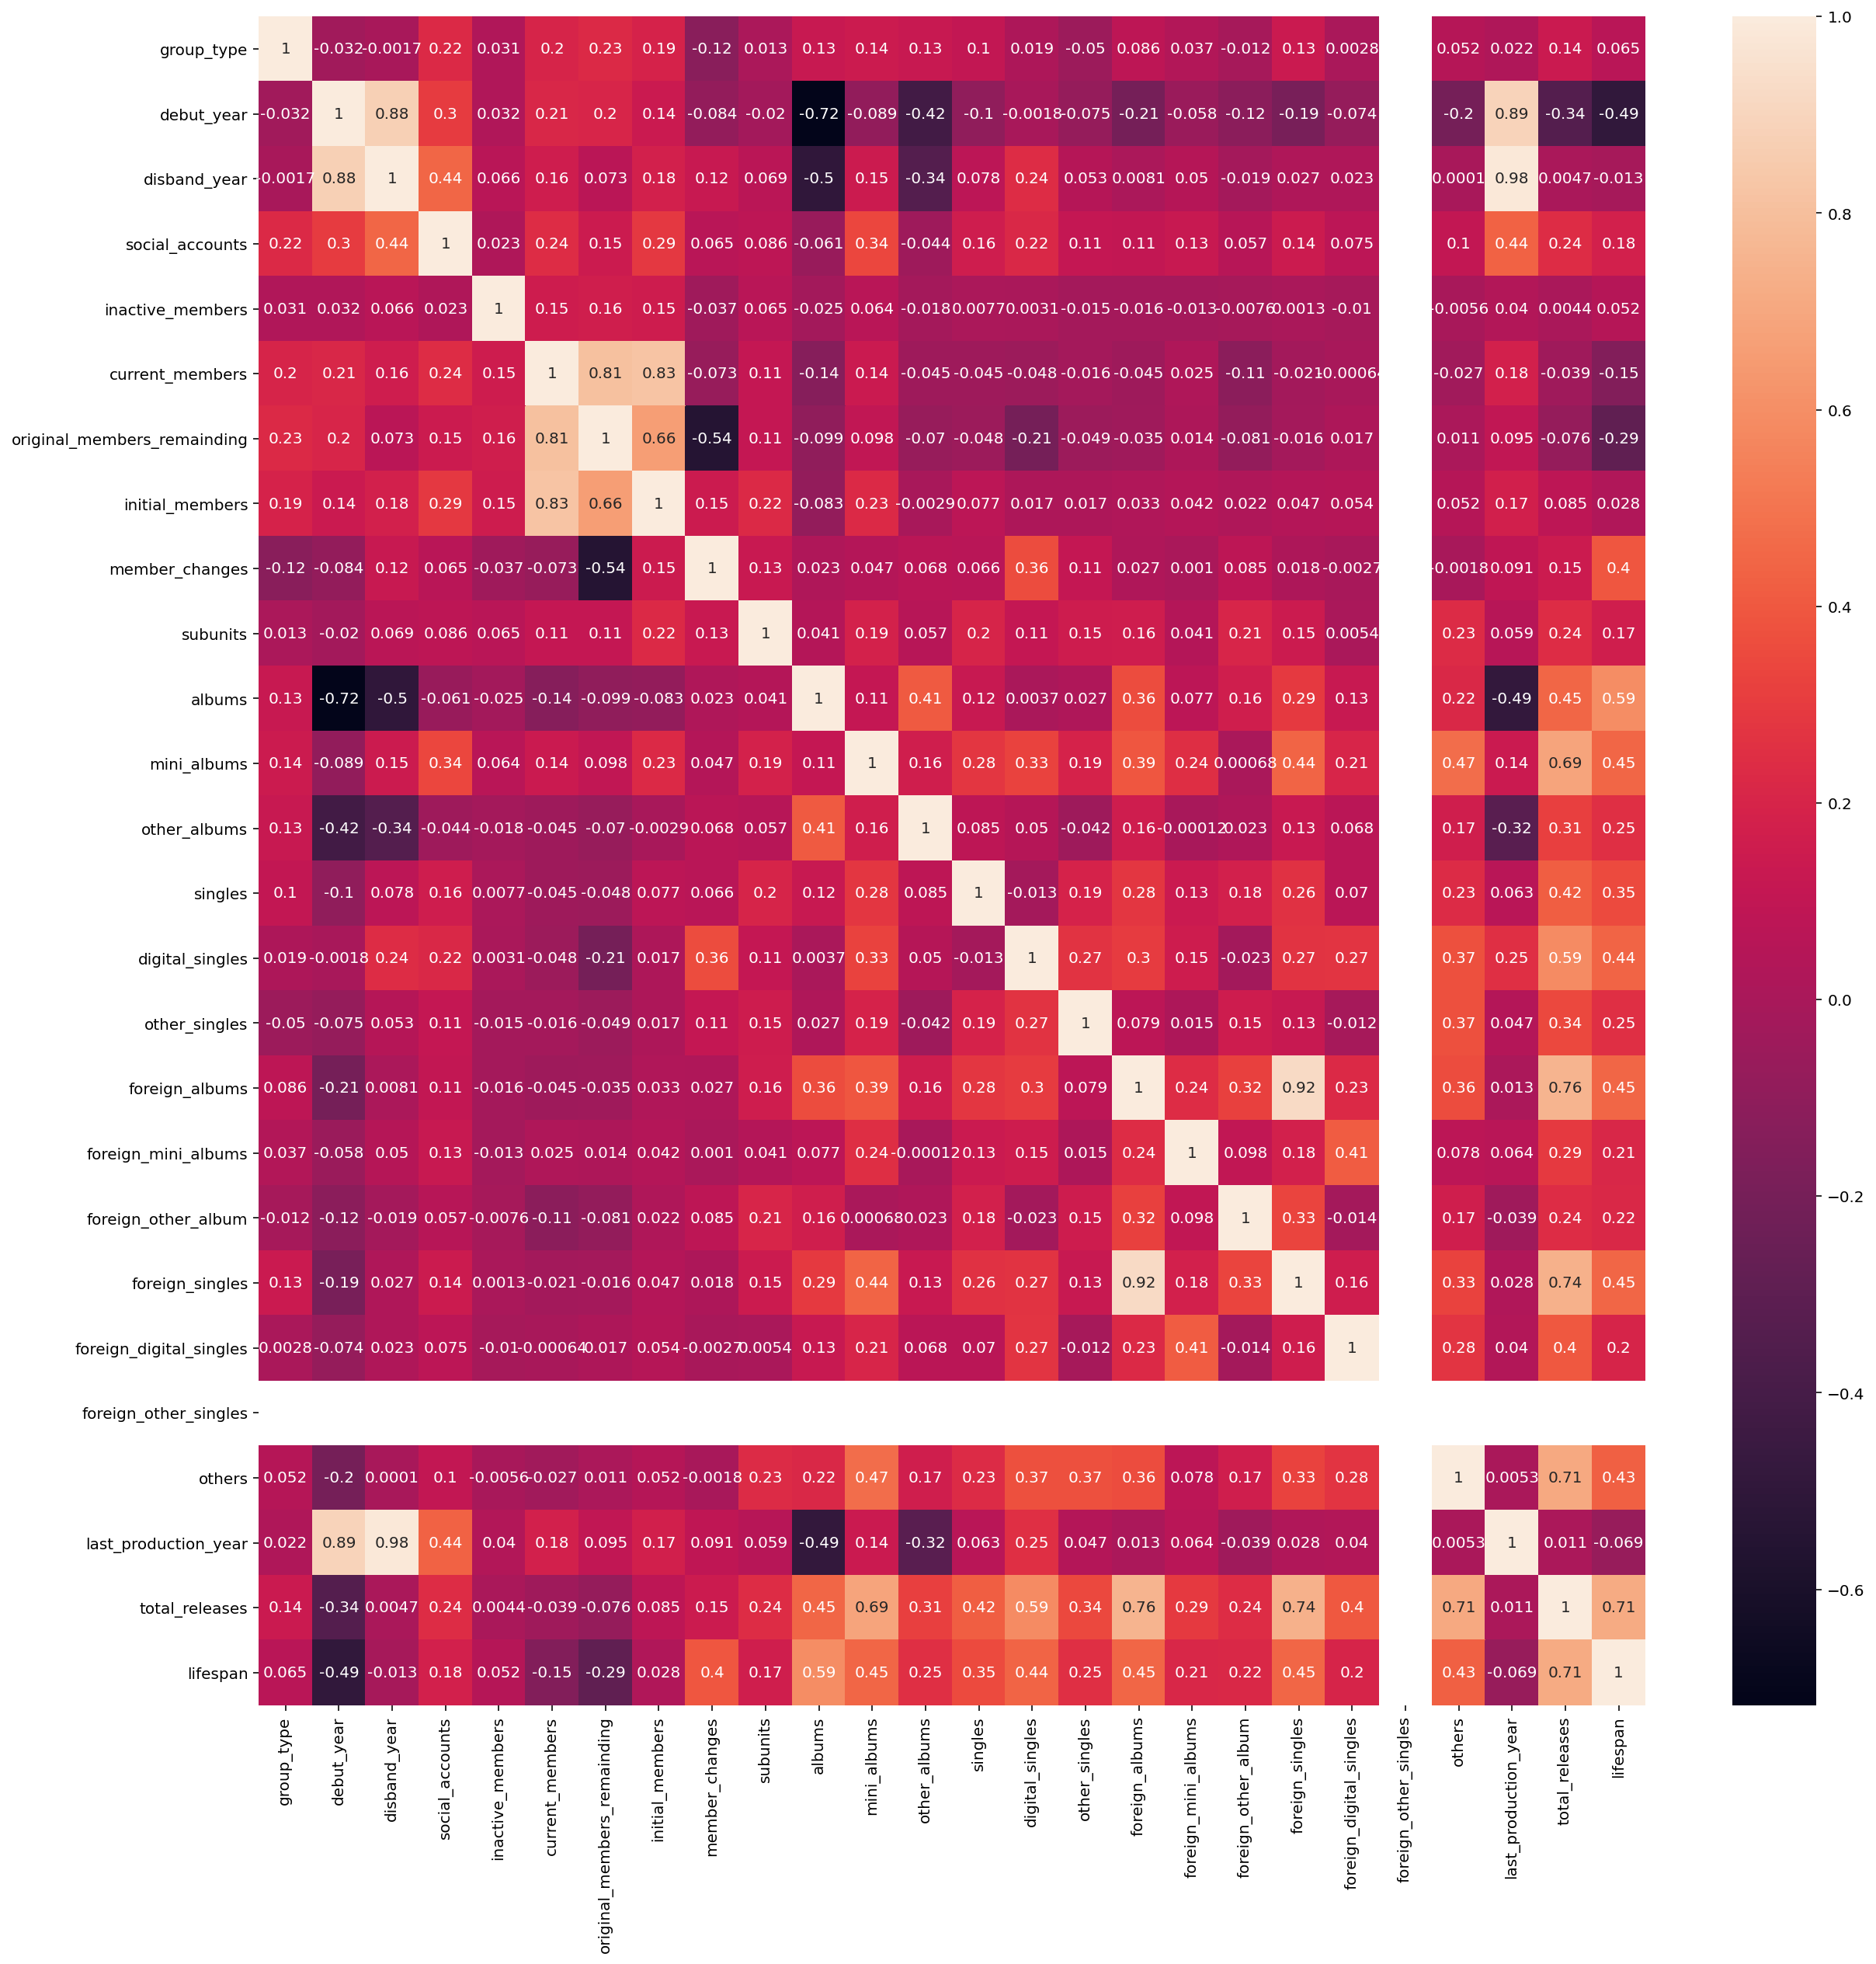

In [18]:
corr = disband_df.drop(['group_name','company'], axis = 1)
plt.figure(figsize=(20,20))
sns.heatmap(corr.corr(),annot = True)
plt.savefig("../img/Heatmap.jpg",dpi=1000,bbox_inches='tight')

We notice that foreign_other_singles blank as that is because its all 0s in the columns. 

There are also some highly correlated datas with disband_year and "last_production_year. This is because to know when the 'last_production_year' is, we would assume that there will not be any future production after that year. This indirectly implies that the band is disbanded.

One other highly correlated pair "debut_year" and "last_production_year" this indicates to us that most groups tend to not make it pass the first year of their debut year. We can see this in more details in the later part of the EDA

lastly we notice that "foreign_other_singles" is missing its data. this is because the entire feature is filled with 0s thus it did not provide any useful information. Thus will be removed first.

In [19]:
disband_df.drop('foreign_other_singles',axis = 1 ,inplace = True)
active_df.drop('foreign_other_singles',axis = 1 ,inplace = True)

### 3.4 Analysis

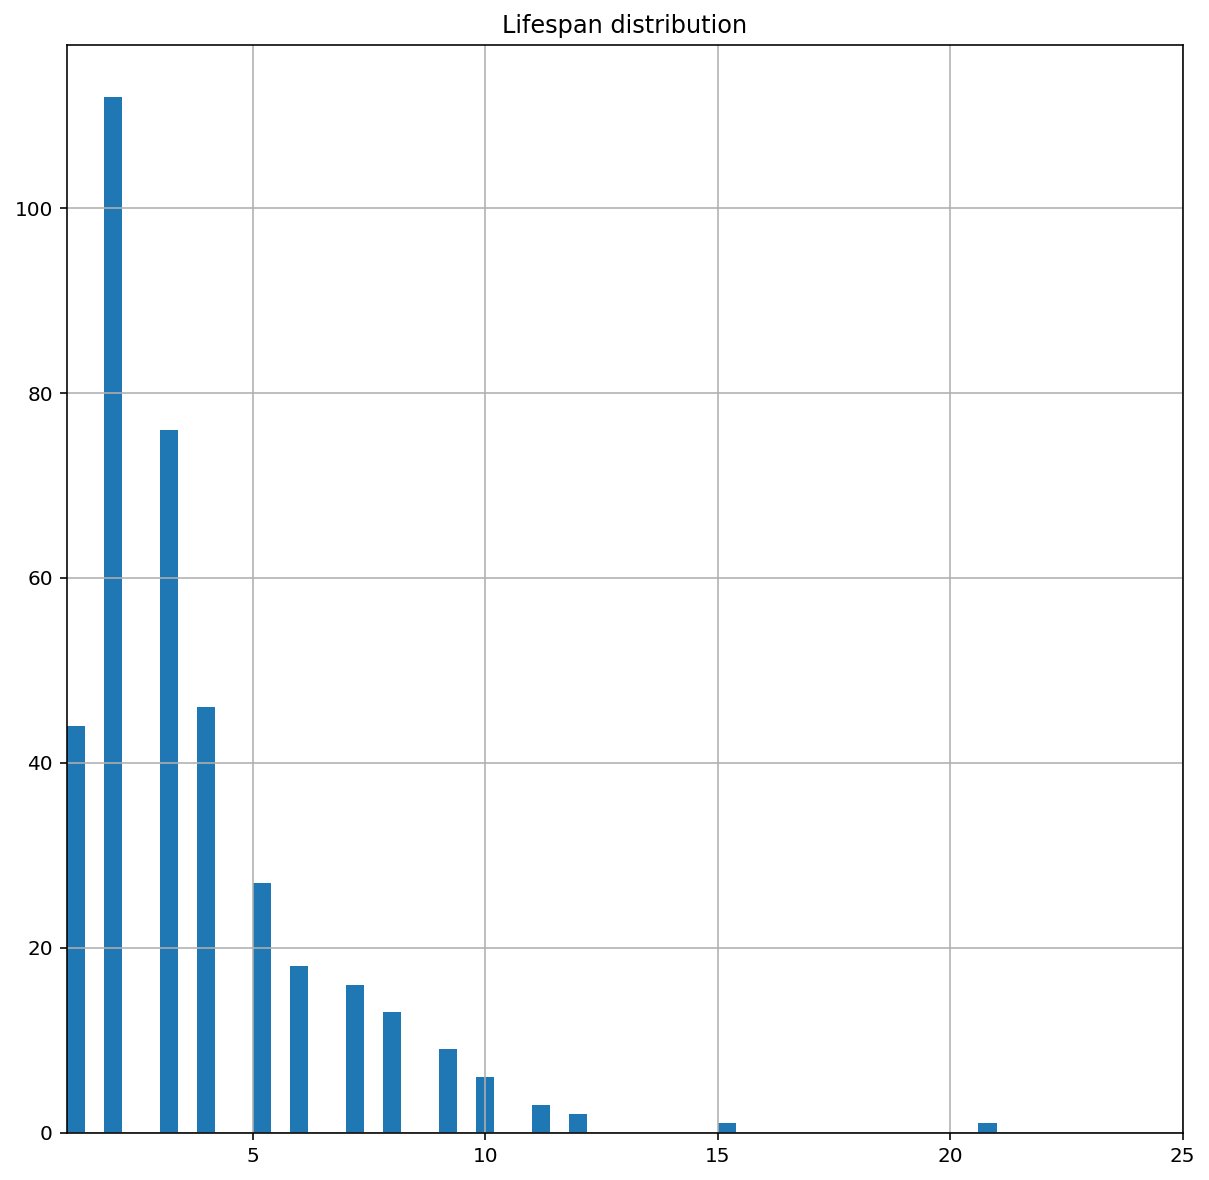

In [37]:
plt.figure(figsize=(10,10))
plt.title('Lifespan distribution')
disband_df.lifespan.hist(bins = 50)
plt.xlim(1,25);
plt.savefig("../img/lifespan_distribution.jpg",dpi=1000,bbox_inches='tight')

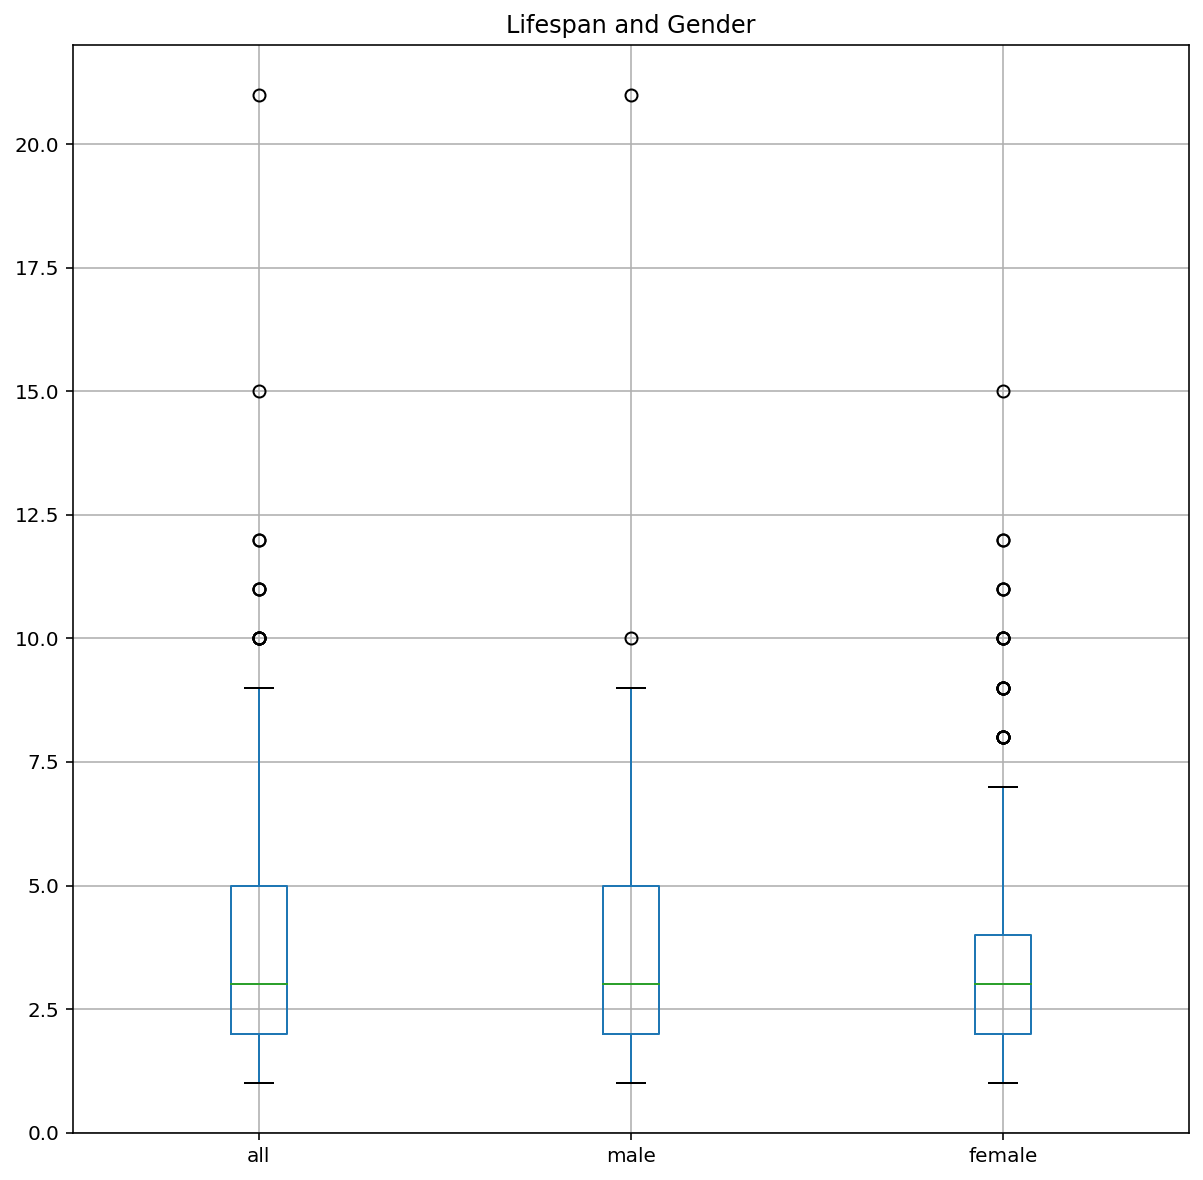

In [21]:
plt.figure(figsize=(10,10))
plt.title('Lifespan and Gender')
f_bx = disband_df.loc[disband_df.group_type == 0].boxplot(positions = [3], column=['lifespan'])
b_bx = disband_df.loc[disband_df.group_type == 1].boxplot(positions = [2], column=['lifespan'])
d_bx = disband_df.boxplot(positions = [1], column=['lifespan'])
plt.xticks([1, 2, 3], ['all', 'male', 'female']);
plt.savefig("../img/lifespan.jpg",dpi=1000,bbox_inches='tight')

We see that the distribution of the lifespan is pretty similar amoung the the group_type. In general we shouldn't expect the group_type to affect the lifespan of a music group much.

In [22]:
yearly_disband = pd.DataFrame()
yearly_debut = pd.DataFrame()
for year in range(1990,musicgroup_df.disband_year.max()+1):
    yearly_disband[year] = [len(musicgroup_df[(musicgroup_df.disband_year == year)])]
    yearly_debut[year] = [len(musicgroup_df[(musicgroup_df.debut_year == year)])]

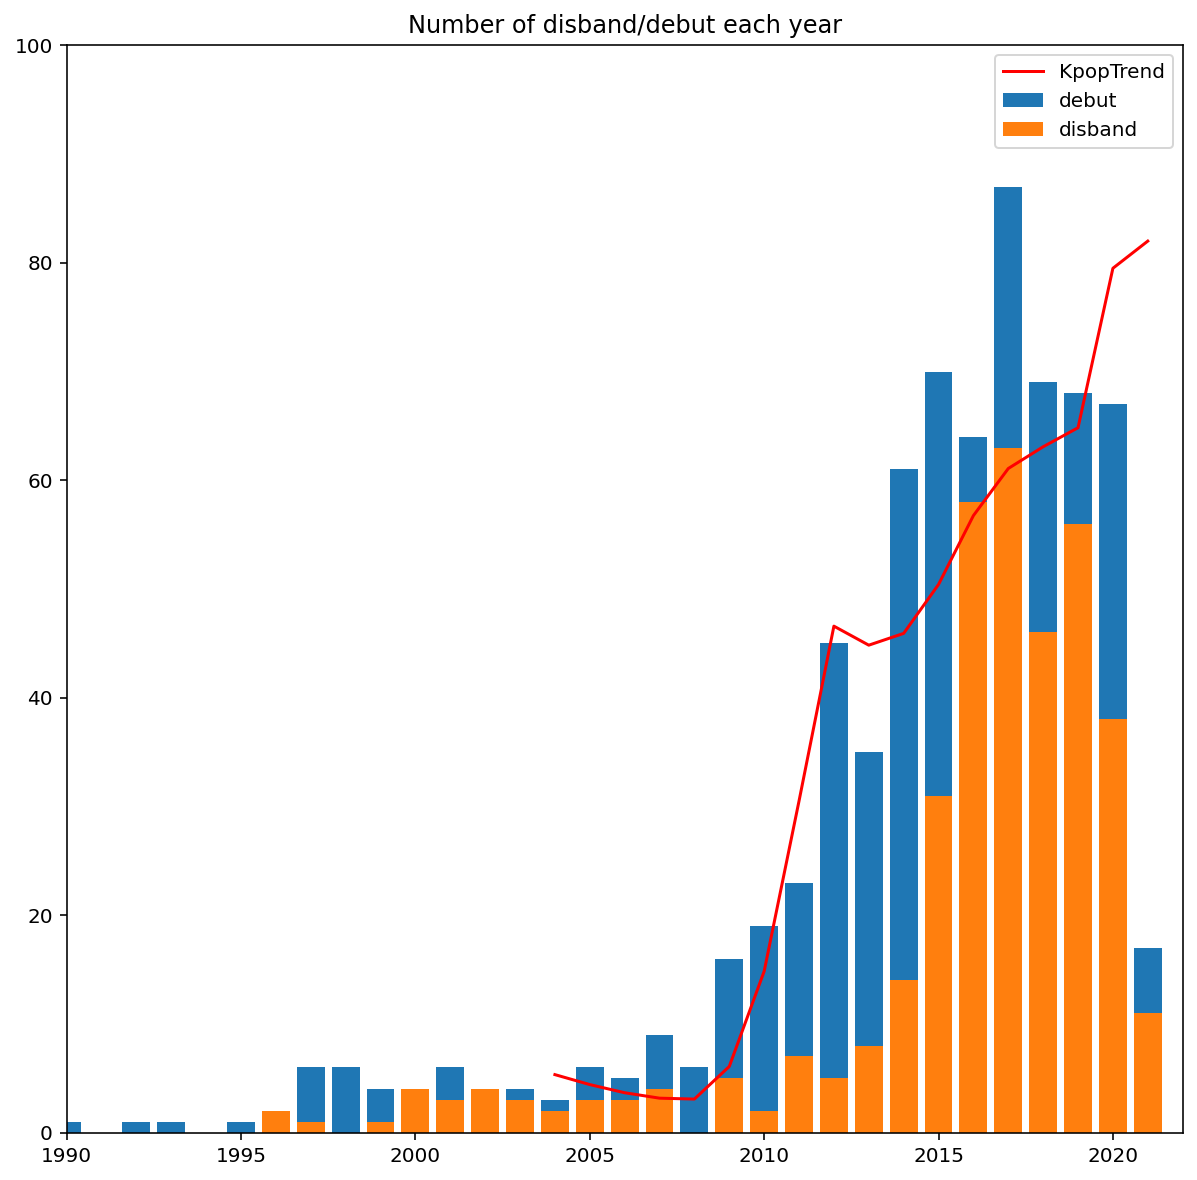

In [23]:
plt.figure(figsize=(10,10))
plt.title('Number of disband/debut each year')
plt.bar(yearly_debut.columns, yearly_debut.iloc[0],label = 'debut')
plt.bar(yearly_disband.columns, yearly_disband.iloc[0],  label = 'disband')
plt.plot(trend_df,'r',label = 'KpopTrend')
plt.legend()
plt.xlim(1990,2022)
plt.ylim(0,100)
plt.savefig("../img/trend_with_disband_debut.jpg",dpi=1000,bbox_inches='tight')

In [24]:
yearly_active = pd.DataFrame()
male_yearly_active = pd.DataFrame()
female_yearly_active = pd.DataFrame()
for year in range(1990,musicgroup_df.disband_year.max()+1):
    yearly_active[year] = [len(musicgroup_df[(musicgroup_df.debut_year <= year) & ((musicgroup_df.disband_year >= year) | (musicgroup_df.disband_year == 0))])] 
    male_yearly_active[year] = [len((musicgroup_df[musicgroup_df.group_type == 1][(musicgroup_df[musicgroup_df.group_type == 1].debut_year <= year) & ((musicgroup_df[musicgroup_df.group_type == 1].disband_year >= year) | (musicgroup_df[musicgroup_df.group_type == 1].disband_year == 0))]))]
    female_yearly_active[year] = [len((musicgroup_df[musicgroup_df.group_type == 0][(musicgroup_df[musicgroup_df.group_type == 0].debut_year <= year) & ((musicgroup_df[musicgroup_df.group_type == 0].disband_year >= year) | (musicgroup_df[musicgroup_df.group_type == 0].disband_year == 0))]))]

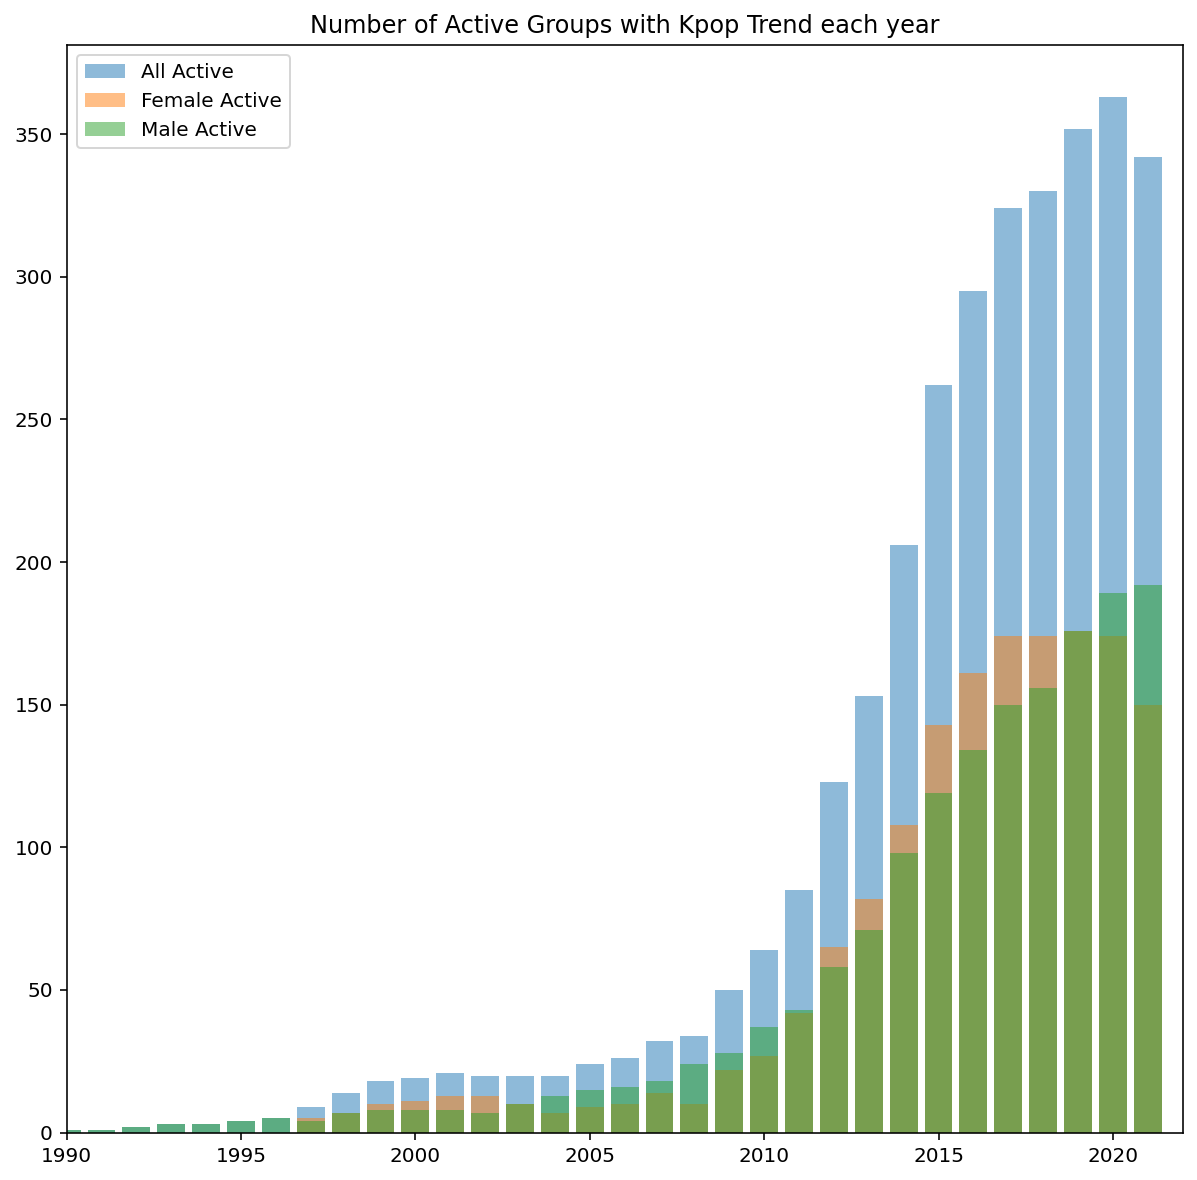

In [25]:
plt.figure(figsize=(10,10))
plt.title('Number of Active Groups with Kpop Trend each year')
plt.bar(yearly_active.columns, yearly_active.iloc[0],  label = 'All Active',alpha = 0.5)
plt.bar(yearly_active.columns, female_yearly_active.iloc[0],label = 'Female Active',alpha = 0.5)
plt.bar(yearly_active.columns, male_yearly_active.iloc[0],label = 'Male Active',alpha = 0.5)
plt.legend()
plt.xlim(1990,2022)
plt.savefig("../img/trend_with_active.jpg",dpi=1000,bbox_inches='tight')

From the chart we see that the number of active group in a year increase quite steeply from the year 2008 onwards. This coincide with the data collected from google where it shows the trend of the term 'kpop'.

We also notice that in the earlier years the female groups tend to outnumber the male groups. However from the last two years we see that the numbers are starting to even out. This is not due to have more active male groups but the disbanding of multple female groups.

Lastly the amount of active groups each year seems to be leveling off since 2013 dispite the increasing trend. We speculate that this could be the current upper limit of the market industry which it is able to support.

### 3.8. Summary

## Exporting Data

In [ ]:
# Placed the # to refrain from executing
disband_df.to_csv("../data/disband_train.csv", index = False)
active_df.to_csv("../data/active_test.csv", index = False)